In [1]:
import glob
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import torch

from data_loader import Triplet_Dataset

In [2]:
train_dataset = Triplet_Dataset(
    img_dir='../data/train',
    img_size=64
)

train_dataloader = torch.utils.data.DataLoader(
    train_dataset, 
    batch_size=16,
    shuffle=True
)

In [3]:
for data_dict in train_dataloader:
    anc_img = data_dict['anc_img']
    pos_img = data_dict['pos_img']
    neg_img = data_dict['neg_img']
    pos_label = data_dict['pos_label']
    neg_label = data_dict['neg_label']
    break

In [4]:
def disp(img_tnsr):
    imgs = np.transpose(np.array(img_tnsr), (0,2,3,1))
    plt.figure(figsize=(15,5))
    for i in range(len(imgs)):
        plt.subplot(2,8,i+1)
        plt.imshow(imgs[i])

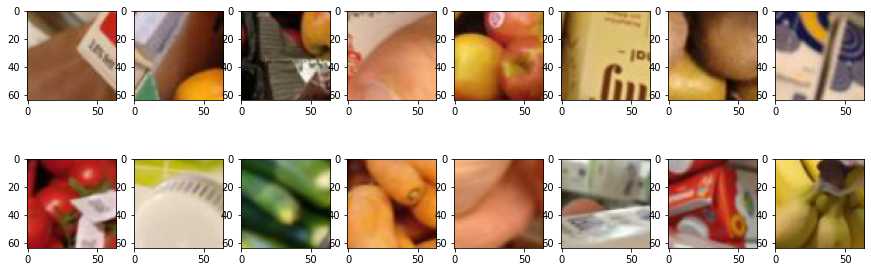

In [5]:
disp(anc_img)

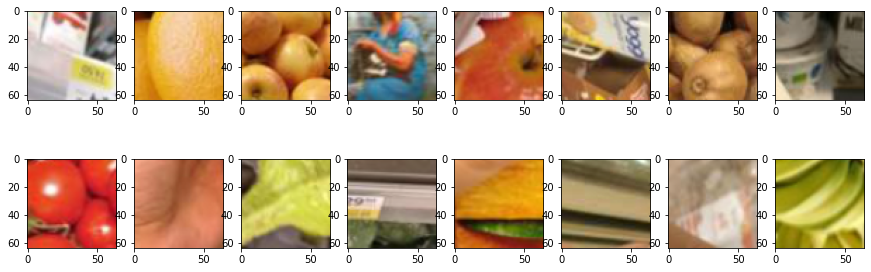

In [6]:
disp(pos_img)

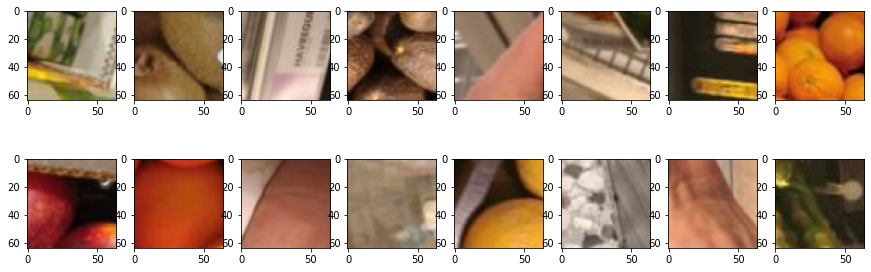

In [7]:
disp(neg_img)

In [8]:
import torch
import torch.nn as nn

from torchvision.models import resnet50

class TripletNet(nn.Module):
    def __init__(self, embedding_size=64):
        super(TripletNet, self).__init__()
        resnet = resnet50(pretrained=True)
        resnet.fc = nn.Linear(2048, embedding_size)
        
        self.resnet = resnet
        self.sfmx = nn.Softmax(dim=1)

    def forward(self, anc_img, pos_img, neg_img):
        anc_pred = self.sfmx(self.resnet(anc_img))
        pos_pred = self.sfmx(self.resnet(pos_img))
        neg_pred = self.sfmx(self.resnet(neg_img))

        return anc_pred, pos_pred, neg_pred 

    def predict(self, img):
        pred = self.sfmx(self.resnet(img))
        return pred

In [9]:
resnet = resnet50(pretrained=True)
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [10]:
model = TripletNet()
anc_pred, pos_pred, neg_pred = model(anc_img, pos_img, neg_img)

In [11]:
loss_fn = torch.nn.TripletMarginLoss()

In [12]:
loss_fn(anc_pred, pos_pred, neg_pred)

tensor(0.9974, grad_fn=<MeanBackward0>)

In [13]:
for i in range(10):
    print('ss')

ss
ss
ss
ss
ss
ss
ss
ss
ss
ss


In [14]:
i

9